<p><font size="6"> <span style="color:grau"> <b> Data Analytics und Machine Learning - Python für Fortgeschrittene</b></span></font> </br></p> 
<p><font size="5"> <span style="color:grau"> <b> Modul 01: Einführung am Beispiel Iris-Daten</b></span></font> </br></p> 

---


# Einstieg in das Thema
---

<p><font size="3">

Der Iris-Datensatz wird häufig als Anfängerdatensatz für maschinelles Lernen verwendet. Der Datensatz ist in Python im Machine-Learning-Paket Scikit-learn enthalten, sodass Benutzer darauf zugreifen können, ohne eine Quelle dafür finden zu müssen.

Der Datensatz besteht aus je 50 Proben von drei Irisarten ( Iris setosa , Iris virginica und Iris versicolor ). Von jeder Probe wurden vier Merkmale gemessen: die Länge und Breite der Kelch- und Blütenblätter in Zentimetern. Der Datensatz wird häufig in Data-Mining-, Klassifizierungs- und Clustering-Beispielen sowie zum Testen von Algorithmen verwendet.



Daten:   
+ Länge und Breite: sepal = Sepalum - Kelchblätter, (grüner) Teil einer Blüte, der die Blüte umschliesst und schützt   
+ Länge und Breite: petal = Blütenblätter selbst
+ Art: setosa, versicolor, verginica : Pflanzenart aus der Gattung Iris


Datenquelle auch: https://archive.ics.uci.edu/ml/datasets/iris



Bilder Iris
<img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png" style="width:500;height:300px;" >

# Irisblüten - Supervised Learning - Classification
***


## Daten laden


In [5]:
from sklearn.datasets import load_iris
iris = load_iris()

## Beschreibung der Daten

In [ ]:
print(iris.DESCR)

## Daten aufteilen Feature und Label

In [6]:
X = iris.data       # Features; Input mit Grossbuchstaben
y = iris.target     # Label;    Output mit Kleinbuchstaben
X.shape, y.shape

((150, 4), (150,))

## Vektoren aus den Basisdaten aufbauen

In [7]:
X_sepal_length = X[:, 0]    # alle Zeile, Spalte 1; Kelchblatt
X_sepal_width =  X[:, 1]    # alle Zeile, Spalte 2
X_petal_length = X[:, 2]    # alle Zeile, Spalte 3; Blütenblatt
X_petal_width = X[:, 3]     # alle Zeile, Spalte 4

## Aufteilung der Daten Training (60%) und Test (40%)
http://scikit-learn.org/stable/modules/cross_validation.html

Bild Workflow
<img src="https://scikit-learn.org/stable/_images/grid_search_workflow.png" style="width:750px;height:450px;" >

In [8]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape
#
# train_size=       Anteil Training, es reicht entweder train oder test
# test_size= 0.4    Anzeil Test 40%
# random_state=42   Steuert das Mischen, das auf die Daten angewendet wird, bevor die Aufteilung angewendet wird. 
#                   Übergeben Sie ein int für eine reproduzierbare Ausgabe über mehrere Funktionsaufrufe hinweg.
# shuffle=          Ob die Daten vor dem Teilen gemischt werden sollen oder nicht. Wenn shuffle=False ist, muss stratify None sein.
# stratify=y        Schichten: Wenn nicht Keine, werden die Daten geschichtet aufgeteilt, wobei dies als Klassenbezeichnungen verwendet wird.

((90, 4), (90,), (60, 4), (60,))

## Wir trainieren einen einfachen Nearest Neighbors Classification und überprüfen die Ergebnisse

<p><font size="3">
Die nachbarschaftsbasierte Klassifikation ist eine Art von instanzbasiertem Lernen oder nicht generalisierendem Lernen : Sie versucht nicht, ein allgemeines internes Modell zu konstruieren, sondern speichert lediglich Instanzen der Trainingsdaten. Die Klassifizierung wird aus einer einfachen Mehrheitsentscheidung der nächsten Nachbarn jedes Punktes berechnet: Einem Abfragepunkt wird die Datenklasse zugewiesen, die die meisten Repräsentanten innerhalb der nächsten Nachbarn des Punktes hat.

scikit-learn implementiert zwei verschiedene Nächstnachbarn-Klassifikatoren: 
+ KNeighborsClassifier (KNC) implementiert Lernen basierend auf den *k* nächste Nachbarn jedes Abfragepunkts, wobei *k* ein ganzzahliger Wert ist, der vom Benutzer angegeben wird. 
+ RadiusNeighborsClassifier (RNC) implementiert Lernen basierend auf der Anzahl der Nachbarn innerhalb eines festen Radius *r* von jedem Trainingspunkt, wo *r* ein vom Benutzer angegebener Gleitkommawert ist.

KNC ist die am häufigsten verwendete Technik. Die optimale Wahl des Wertes *k* ist stark datenabhängig: im Allgemeinen ein größeres *k*  unterdrückt die Auswirkungen von Rauschen, macht aber die Klassifikationsgrenzen weniger deutlich.

http://scikit-learn.org/stable/modules/neighbors.html#classification

## Erstellen eines ersten Klassifikationsmodells

Parameter von *neighbors.KNeighborsClassifier*: [Link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

In [14]:
# clf ist erster Estimator (Klassifikationsmodell)
#
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(1)

In [15]:
# clf ist erster Estimator (Klassifikationsmodell) wird mit den Testdaten trainiert
#
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

## Welche Vorhersagen können Basis des Klassifikationsmodells mit Trainingsdaten vorhergesagt werden

In [ ]:
x = 0
for i in range(len(X_test)):
    sample_feature = X_test[i]
    sample_label = y_test[i]
    predict_label = clf.predict([sample_feature])
    if int(predict_label) == int(sample_label):
        x += 1
    print("Testdaten: sample label: ", sample_label, "predict label: ", int(predict_label))
#
# Ergebnis: Auf Basis der Trainingsdaten wird eine richtige Vorhersage getroffen 😊
print(i, x)

## Überprüfung der Vertrauenswürdigkeit (Scores) der Antwort - anhand der Trainingsdaten

In [ ]:
clf.score(X_train, y_train)     # .score Methode - Wie gut passen die Trainingsdaten zum Modell?
#
# Ergebnis sollte 1.0 sein, da diese Daten für das Training (Generalisierung) des Modells verwendet wurden

## Überprüfung der Vertrauenswürdigkeit (Scores) der Antwort - amhand der Testdaten

In [36]:
clf.score(X_test, y_test)
#
# Ergebnis liefert erste echte Probe, da diese Daten nicht für das Training verwendet wurden. 
# Wert von 0.95 besagt, dass 95% der Testdaten richtig vorhergesagt werden können. 

0.95

## Um zu versehen, was durch das Training passiert ist, zeichnen wir ein Streupunktdigramm

Quelle: Machine Learning kurz und gut

In [38]:
# Code-Schnipsel für ein Streupunkt-Diagramm
# vereinfachte Fassung von
# http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

font_size=18
  
def plotPrediction(clf, x_data, y_data, x_label, y_label, colors, title=""):
    plt.figure(figsize=(15,8))
    plt.scatter(x_data, y_data, c=colors, cmap=cmap, s=80, marker='o')
    plt.xlabel(x_label, fontsize=font_size)
    plt.ylabel(y_label, fontsize=font_size)
    plt.title(title, fontsize=font_size)

## Für beide Features (Kelchblatt und Blütenblatt)

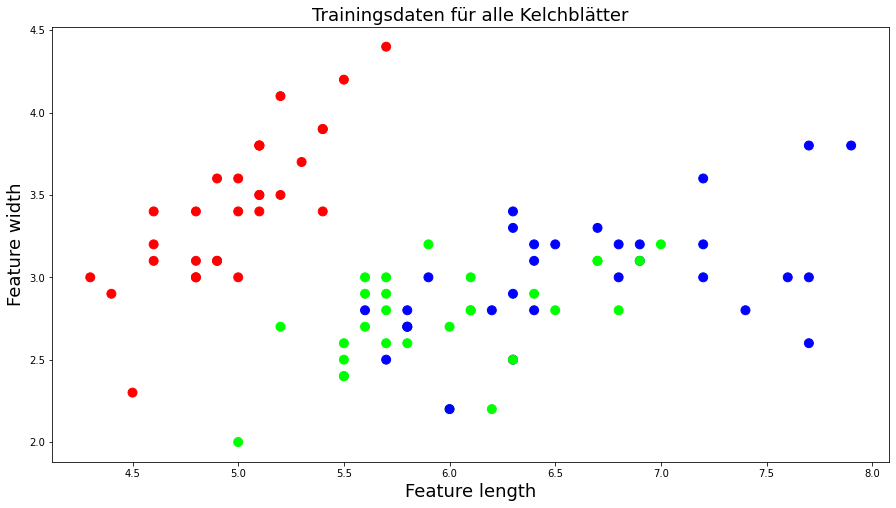

In [50]:
plotPrediction(clf, X_train[:, 0], X_train[:, 1], 
               'Feature length', 'Feature width', y_train, 
                title="Trainingsdaten für alle Kelchblätter")

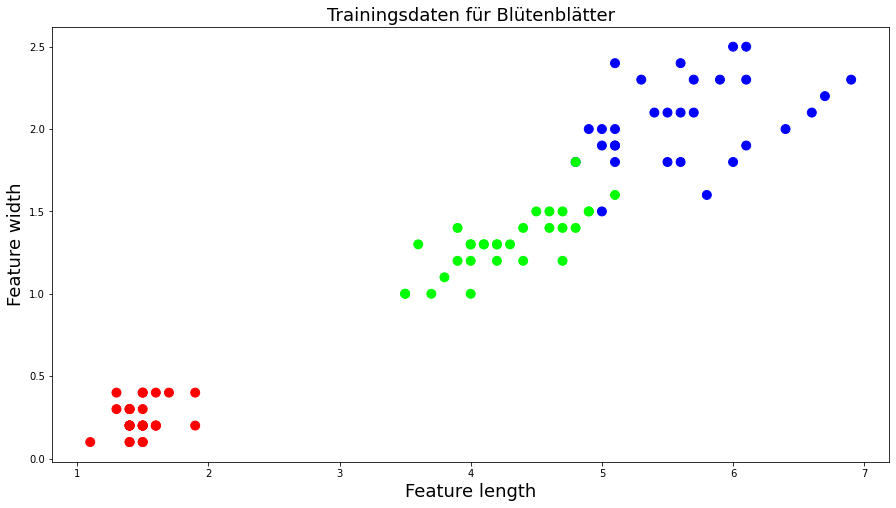

In [47]:
plotPrediction(clf, X_train[:, 2], X_train[:, 3], 
               'Feature length', 'Feature width', y_train, 
                title="Trainingsdaten für Blütenblätter")

## NNC nur mit Kelchblatt (sepal) und Variation der Anzahl der Nachbarn

Parameter von *neighbors.KNeighborsClassifier*: [Link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

In [67]:
# Test- und Trainingsdaten
X_train_sepal_only = X_train[:, :2]
X_test_sepal_only = X_test[:, :2]
# Modell definieren und trainieren
for i in range(10,0, -1):
    clf_sepal = neighbors.KNeighborsClassifier(i)
    clf_sepal.fit(X_train_sepal_only, y_train)
# Vetrauenswürdigkeit Scores für Trainings- und Testdaten
    print("Anzahl Nachbarn: {:3d} Training:  {:5.3f}   Vorhersage:  {:5.3f}"
    .format(i, clf_sepal.score(X_train_sepal_only, y_train), clf_sepal.score(X_test_sepal_only, y_test)))

Anzahl Nachbarn:  10 Training:  0.778   Vorhersage:  0.783
Anzahl Nachbarn:   9 Training:  0.778   Vorhersage:  0.783
Anzahl Nachbarn:   8 Training:  0.778   Vorhersage:  0.767
Anzahl Nachbarn:   7 Training:  0.789   Vorhersage:  0.817
Anzahl Nachbarn:   6 Training:  0.822   Vorhersage:  0.817
Anzahl Nachbarn:   5 Training:  0.856   Vorhersage:  0.833
Anzahl Nachbarn:   4 Training:  0.867   Vorhersage:  0.683
Anzahl Nachbarn:   3 Training:  0.867   Vorhersage:  0.717
Anzahl Nachbarn:   2 Training:  0.822   Vorhersage:  0.717
Anzahl Nachbarn:   1 Training:  0.944   Vorhersage:  0.767


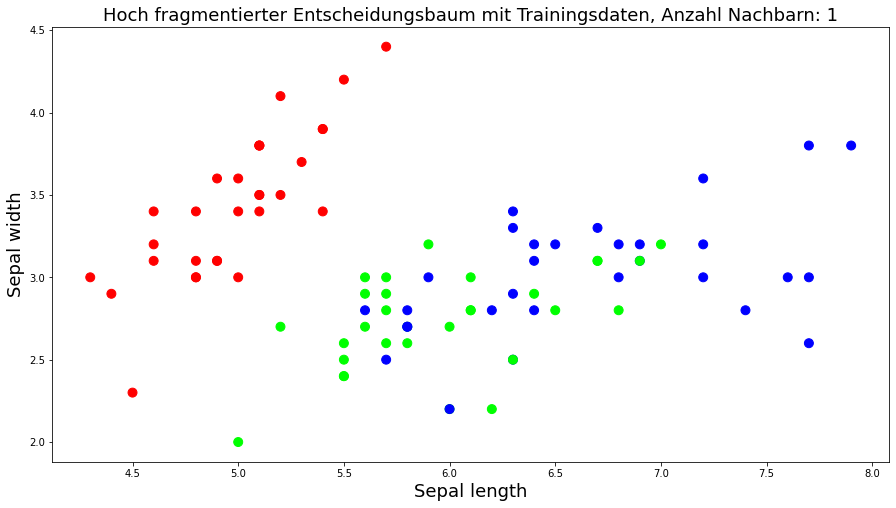

In [126]:
plotPrediction(clf_sepal, X_train_sepal_only[:, 0], X_train_sepal_only[:, 1], 
               'Sepal length', 'Sepal width', y_train,
               title=f"Hoch fragmentierter Entscheidungsbaum mit Trainingsdaten, Anzahl Nachbarn: {i}")

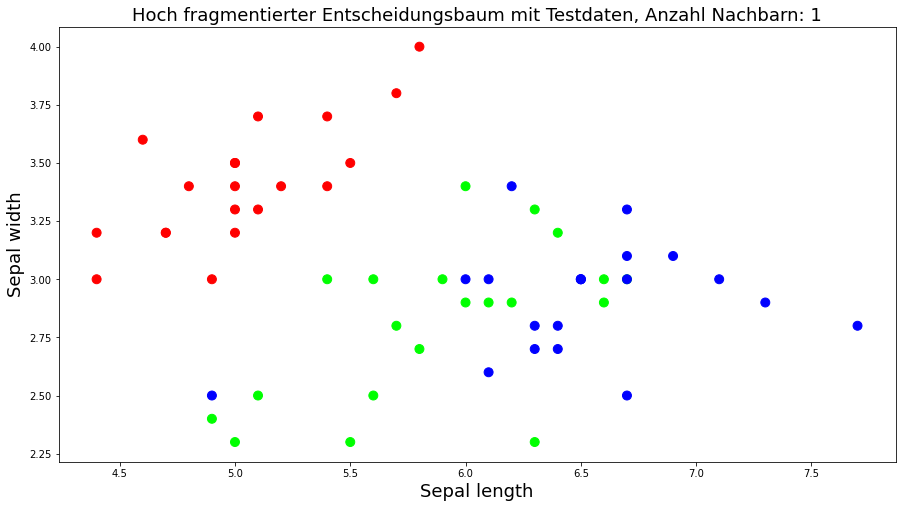

In [127]:
plotPrediction(clf_sepal, X_test_sepal_only[:, 0], X_test_sepal_only[:, 1], 
               'Sepal length', 'Sepal width', y_test,
               title=f"Hoch fragmentierter Entscheidungsbaum mit Testdaten, Anzahl Nachbarn: {i}")

## NNC nur mit Blütenblatt (petal) und Variation der Anzahl der Nachbarn

Parameter von *neighbors.KNeighborsClassifier*: [Link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

In [69]:
# Test- und Trainingsdaten
X_train_petal_only = X_train[:, 2:]
X_test_petal_only = X_test[:, 2:]
# Modell definieren und trainieren
for i in range(10,0, -1):
    clf_petal = neighbors.KNeighborsClassifier(i)
    clf_petal.fit(X_train_petal_only, y_train)
# Vetrauenswürdigkeit Scores für Trainings- und Testdaten
    print("Anzahl Nachbarn: {:3d} Training:  {:5.3f}   Vorhersage:  {:5.3f}"
    .format(i, clf_petal.score(X_train_petal_only, y_train), clf_petal.score(X_test_petal_only, y_test)))

Anzahl Nachbarn:  10 Training:  0.967   Vorhersage:  0.950
Anzahl Nachbarn:   9 Training:  0.967   Vorhersage:  0.950
Anzahl Nachbarn:   8 Training:  0.967   Vorhersage:  0.950
Anzahl Nachbarn:   7 Training:  0.967   Vorhersage:  0.950
Anzahl Nachbarn:   6 Training:  0.978   Vorhersage:  0.950
Anzahl Nachbarn:   5 Training:  0.978   Vorhersage:  0.950
Anzahl Nachbarn:   4 Training:  0.978   Vorhersage:  0.950
Anzahl Nachbarn:   3 Training:  0.967   Vorhersage:  0.950
Anzahl Nachbarn:   2 Training:  0.978   Vorhersage:  0.917
Anzahl Nachbarn:   1 Training:  0.989   Vorhersage:  0.983


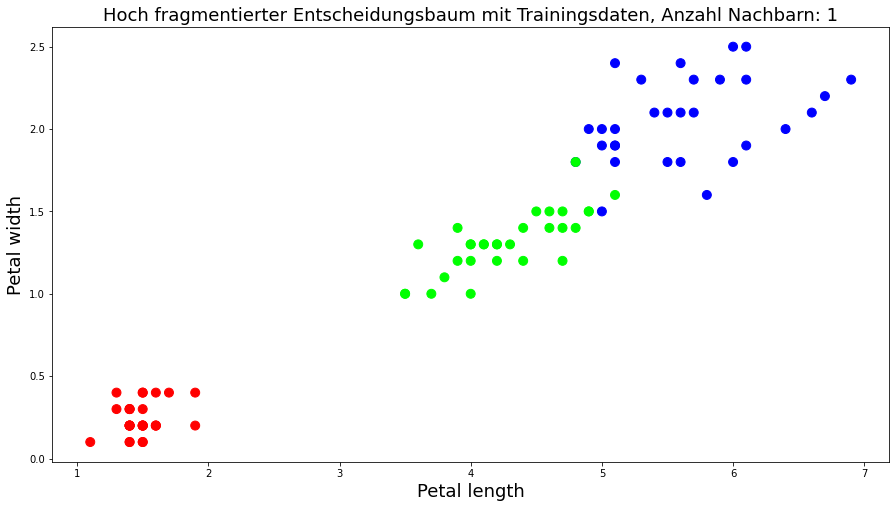

In [129]:
# 
plotPrediction(clf_petal, X_train_petal_only[:, 0], X_train_petal_only[:, 1], 
               'Petal length', 'Petal width', y_train, 
               title=f"Hoch fragmentierter Entscheidungsbaum mit Trainingsdaten, Anzahl Nachbarn: {i}")

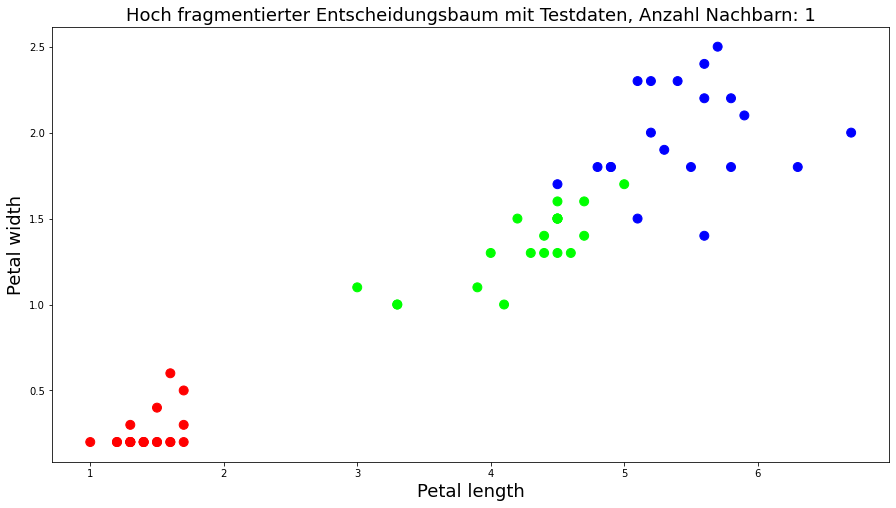

In [131]:
plotPrediction(clf_petal, X_test_petal_only[:, 0], X_test_petal_only[:, 1], 
               'Petal length', 'Petal width', y_test,
               title=f"Hoch fragmentierter Entscheidungsbaum mit Testdaten, Anzahl Nachbarn: {i}")

<p><font size="3">

**Overfitting:**


Modell funktioniert auf Trainingsdaten besser als auf Testdaten, d.h. unbekannte Daten werden nicht gut generalisiert. Zu viele erklärende Variablen.

Wikipedia [Link](https://de.wikipedia.org/wiki/%C3%9Cberanpassung)

**Underfitting:**

Modell ist zu einfach konzipiert und kann nicht einmal die Trainingsdaten annähernd reproduzieren. Zu wenig erklärende Variablen.



colab [Link](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/overfit_and_underfit.ipynb)